Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 02: Color & Basic Operators

## Introduction

This week's sheet should be solved and handed in before end of **Monday, November 25, 2023**. If you need help (and Google and other resources were not enough), use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary.
There will be a similar exercise on following sheets.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

YOUR ANSWER HERE

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

YOUR ANSWER HERE

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

YOUR ANSWER HERE

## Assignment 1: Color perception and color spaces (4 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

Colour perception in humans works the following way:
- colours are perceived as different wavelenghts of the electromagnetic wave that is light
- visible light for humans is in the range 400 to 700 nanometers (particularly sensitive in range btw 530 to 560nm)
- the rainbow shows all distinct colours for the different wavelengths 
- in the human eye there are three types of cones that are sensitive to different wavelengths for colour vision: 
1. short ones - for blue wavelenghts, alpha
2. middle ones - for green to yellow, beta
3. long ones - for yellow to red, gamma

The brain interprets color by combining the signals from these cones. Different wavelengths or mixtures of wavelengths stimulate these cones to varying degrees, creating the perception of distinct colors.


So, in order to see the four following different colours, different wavelengths and cones need to be considered:

1. orange: long cones,  580-630nm wavelengths are reflected, the rest is absorbed, in case of rasonating object: only orange wavelenghts resonate and produce orange light, mixture of red & green 
a mix of red and green, with red dominating

2. brown: no specific single wavelength, low intensity light mixtures dominated by red and green viewd in contrast to brigther surroundings

3. purple: 
violett: 400 to 420nm, spectral colour with short wavelength
purple: mixture of red and blue, not a spectral colour


4. white: balanced mix of all visible wavelengths added up 

 
5. black: no light source

### b) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

RGB (physical/technical model) Red Green Blue, 1920
- the basis consists of primary colours, mixing of which allows to span a useful range of colours 
- aims to relate physical light to perceived colour
- additive colour mixing
- good for computer screens eg bc the pixels are self-luminous 
- bad for representung not self-luminous materials eg printed colour (it is substractive and we have CMYK for that)

HSV (perception oriented model) Hue Saturation Level
- basis consists quantities that make sense on a semantic level
- based on perception and verbal description of colours 
- easier description and mixing of colours 
- three values:
1. Hue (where in the circle)
2. Saturation (how far from center, radius)
3. Value (height)


### c) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

additive: the wavelengths are added up: the LEDs of a screen

substractive: the colours are substracted: printer ink

### d) 3D color cube

Plot the colors (red, green, blue, yellow, cyan, magenta, grey, black, white) from additive and subtractive color mixing in a 3D cube. 
Plot points on the corresponding locations and give them the appropriate color. 
Hint: to create the points you can use the *ax.scatter* function, where the *c* argument can take in multiple colors.

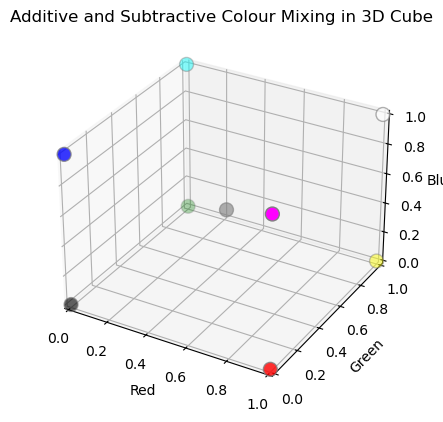

In [5]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# cube with primaries and additives
xs = [1, 0, 0, 1, 0, 1, 0.5, 0, 1]  # x-Werte (width)
ys = [0, 1, 0, 1, 1, 0, 0.5, 0, 1]  # y-Werte (depth)
zs = [0, 0, 1, 0, 1, 1, 0.5, 0, 1]  # z-Werte (height)
colors = ["red", "green", "blue", "yellow", "cyan", "magenta", "grey", "black", "white"]
ax.scatter(xs, ys, zs, c = colors, edgecolors="grey", s = 100)

# Set axis limits for a cube visualization
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Additive and Subtractive Colour Mixing in 3D Cube')
plt.show()

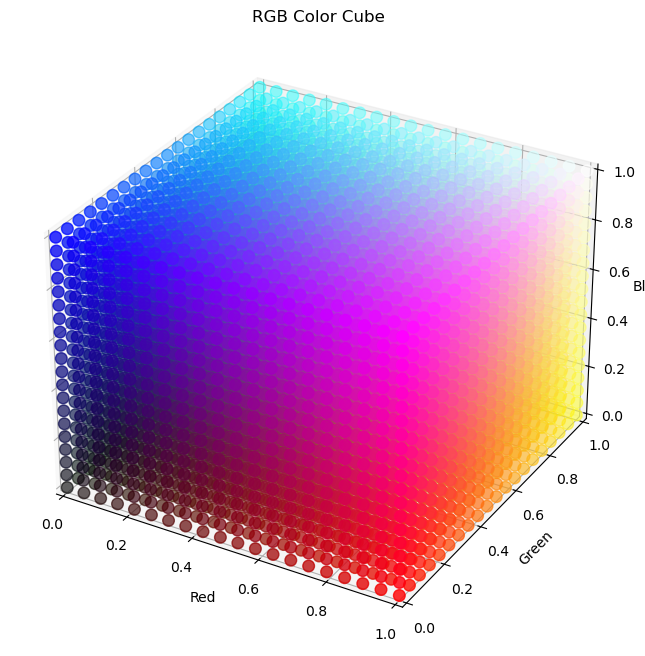

In [6]:
# OR WAS IT SUPPOSED TO BE A CUBE CUBE?

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a fine mesh with rgb values
r = np.linspace(0, 1, 20)  # R-components (0 to 1)
g = np.linspace(0, 1, 20)  # G-componengts (0 to 1)
b = np.linspace(0, 1, 20)  # B-componengts (0 to 1)

# create all possible rgb value combos
R, G, B = np.meshgrid(r, g, b)
points = np.c_[R.ravel(), G.ravel(), B.ravel()]  # all points in an array

# define colours with their rgb values
colors = points

# create 3D-Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with colour transitions
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=70)

# label axes
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# axes limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# title
ax.set_title('RGB Color Cube')

plt.show()

## Assignment 2: Twodimensional Convolution (8 points)

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works. Also provide the formula from the lecture and explain its idea.

Convolution helps computer vision systems detect patterns and features within an image. It works by using a filter kernel that moves across the image row by row and therefore examines only a small region of the image at a time. The size of the Kernel is defined as:
$k(i, j) \in \mathbb{R}^{(2m+1) \times (2n+1)}$, where $m, n \in \mathbb{N}$


We can see here that the kernel is a grid of numbers with the size of (2m+1)x(2n+1). This ensures that the number is odd to have a clear "center" pixel that gets examined.
Within this kernel, each number in the kernel is multiplied with the "center" pixel. These values get added and the result is saved in a new image g.

$g'(x, y) = (g * k)(x, y) = \sum_{i \in [-m, m]} \sum_{j \in [-n, n]} k(i + m, j + n) \cdot g(x + i, y + j)$

1. $g'(x, y)$ is the result of the convolution at the point $(x, y)$ in the output image.
2. $(g * k)(x, y)$ displays the convolution operation of $g$ with the kernel at the respective pixel $(x, y)$.
3. Then we sum up the rows and columns in the range of our kernel.
4. $k(i + m, j + n)$ gives the kernel value at the corresponding position while making sure to use the correct indices.
5. $g(x + i, y + j)$ gives the pixel from the input image that aligns with the kernel value.


Lastly, we multiply these, sum all the products and then we get the convolution result at $g(x ,y)$.

YOUR ANSWER HERE

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Use formulae and proof your answers. 

Hint:

From  CV-03 slide 49: A function $f$ is linear iff 
$f \left( a \cdot x \right) = a \cdot f \left( x \right) $
and
$f \left( x_1 + x_2 \right) = f \left( x_1 \right) + f \left( x_2 \right)$

A function is homogeneous if translating the filtered image is the same as filtering the translated image. I.e. $\operatorname{translate}(g\ast k,\Delta x,\Delta y)[x,y] = (\operatorname{translate}(g,\Delta x,\Delta y)\ast k)[x,y]$


For convolution to be linear, it has to pass the two condition checks from the lecture:

Condition 1. $f \left( a \cdot x \right) = a \cdot f \left (x \right)$

Suppose $g'(x, y) = a \cdot g(x, y)$, where $a$ is a scalar. The convolution becomes:
$(g' \ast k)(x, y) = \sum_{i, j} k(i, j) \cdot g'(x + i, y + j)$.

Substituting $g'(x + i, y + j) = a \cdot g(x + i, y + j)$:
$(g' \ast k)(x, y) = \sum_{i, j} k(i, j) \cdot (a \cdot g(x + i, y + j))$.

Factor $a$ out of the summation:
$(g' \ast k)(x, y) = a \cdot \sum_{i, j} k(i, j) \cdot g(x + i, y + j)$.

Thus:
$(g' \ast k)(x, y) = a \cdot (g \ast k)(x, y)$.

Condition 2: $f(x_1 + x_2) = f(x_1) + f(x_2)$

Suppose $g(x, y) = g_1(x, y) + g_2(x, y)$. The convolution becomes:
$(g \ast k)(x, y) = \sum_{i, j} k(i, j) \cdot g(x + i, y + j)$.

Substitute $g(x + i, y + j) = g_1(x + i, y + j) + g_2(x + i, y + j)$:
$(g \ast k)(x, y) = \sum_{i, j} k(i, j) \cdot \left(g_1(x + i, y + j) + g_2(x + i, y + j)\right)$.

Using the distributive property:
$(g \ast k)(x, y) = \sum_{i, j} k(i, j) \cdot g_1(x + i, y + j) + \sum_{i, j} k(i, j) \cdot g_2(x + i, y + j)$.

Thus:
$(g \ast k)(x, y) = (g_1 \ast k)(x, y) + (g_2 \ast k)(x, y)$.

Therefore convolution is linear.

Now we check if convolution is homogeneous:

Proof of Homogeneity:
Left-hand side: Translating the filtered result
markdown
Code kopieren
The translation of $(g \ast k)(x, y)$ by $(\Delta x, \Delta y)$ is:
$\operatorname{translate}(g \ast k, \Delta x, \Delta y)[x, y] = (g \ast k)(x - \Delta x, y - \Delta y)$.

Substitute the definition of convolution:
$(g \ast k)(x - \Delta x, y - \Delta y) = \sum_{i, j} k(i, j) \cdot g((x - \Delta x) + i, (y - \Delta y) + j)$.
Right-hand side: Filtering the translated input
markdown
Code kopieren
The translation of $g(x, y)$ is:
$\operatorname{translate}(g, \Delta x, \Delta y)[x, y] = g(x - \Delta x, y - \Delta y)$.

The convolution of the translated $g$ with $k$:
$(\operatorname{translate}(g, \Delta x, \Delta y) \ast k)[x, y] = \sum_{i, j} k(i, j) \cdot g((x - \Delta x) + i, (y - \Delta y) + j)$.
Comparison:
markdown
Code kopieren
Both sides simplify to:
$\sum_{i, j} k(i, j) \cdot g(x + i - \Delta x, y + j - \Delta y)$.

Thus:
$\operatorname{translate}(g \ast k, \Delta x, \Delta y)[x, y] = (\operatorname{translate}(g, \Delta x, \Delta y) \ast k)[x, y]$.

Conclusion: Convolution is homogeneous.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

$O(g*k) = O(MN \cdot (2m+1) \cdot(2n+1))=O(4MN(m+0.5)(n+0.5))\approx O(MNmn)$

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *c)*. This is a shorter notation.

Assume that $g$ has a single pixel:
$\displaystyle O(g*k)=O(g*k^R*k^C)=O\left(\sum_{i=0}^m k^C(i) \cdot \left(\sum_{j=0}^n k^R(j) \cdot g(i,j)\right)\right)=O(m) + O(n)=O(m+n)$

The mathematical notation above is not as accurate as possible. But the convolution is seperated into two single vector convolutions. Thereby is the complexity is decreased to $O(m+n)$ for seperable kernels. 

## Assignment 3: Applying Convolution (4 points)

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

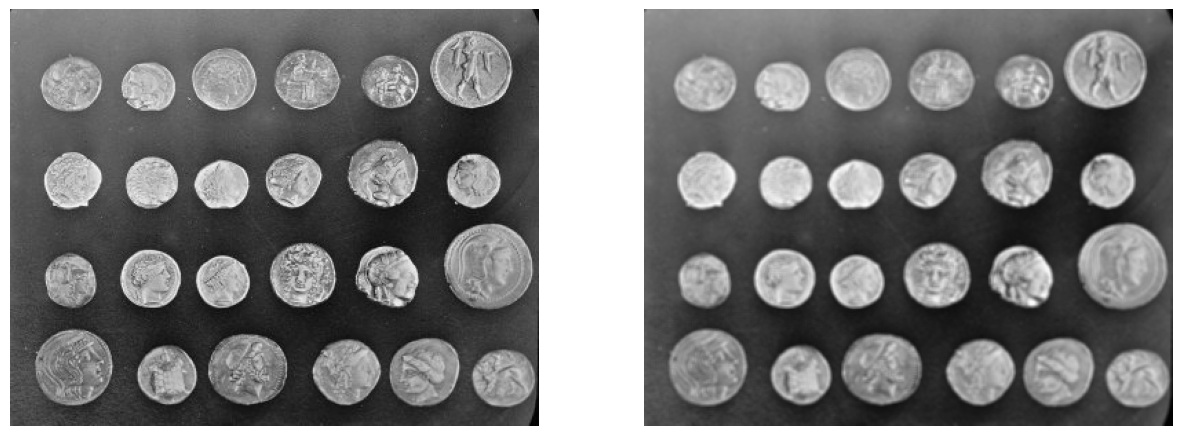

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from scipy.ndimage import convolve
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
def box_filter(image, size=3):
    kernel = np.ones((size,size))/ (size*size)
    return convolve(image, kernel)

filtered_image = box_filter(image)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

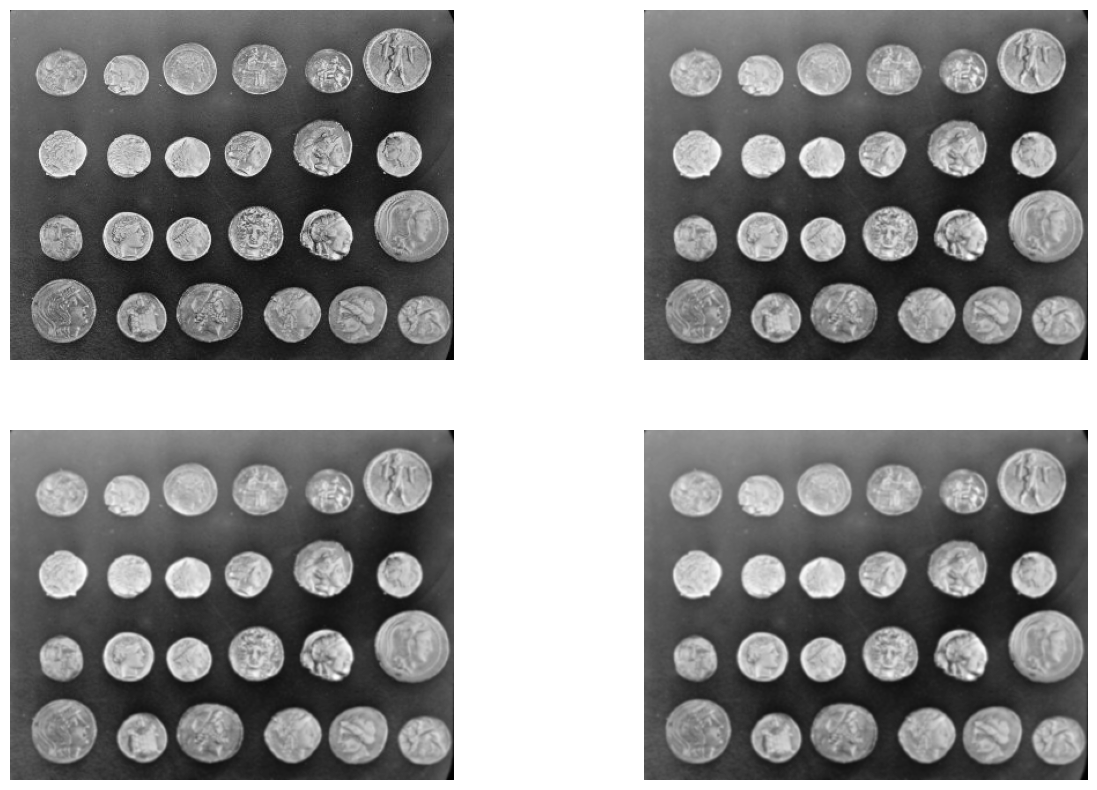

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data
from scipy.ndimage import convolve

# Load an image
#image = imread('me.jpg', pilmode = 'F')
image = data.coins().astype(np.float32)
# YOUR CODE HERE


def gaussian_filter(image, size=9 , sigma=1):
    #meshgrid
    ax = np.linspace(-size // 2, size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    factor = 1 / (2 * np.pi * sigma**2)

    kernel = factor * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return convolve(image, kernel)


filtered_image_3 = gaussian_filter(image, size=3)
filtered_image_5 = gaussian_filter(image, size = 5)
filtered_image_9 = gaussian_filter(image, size = 9)

fig = plt.figure(figsize=(15,10))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,2)
plt.imshow(filtered_image_3, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(filtered_image_5, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image_9, cmap = 'gray')
plt.axis('off')

#plt.tight_layout()
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

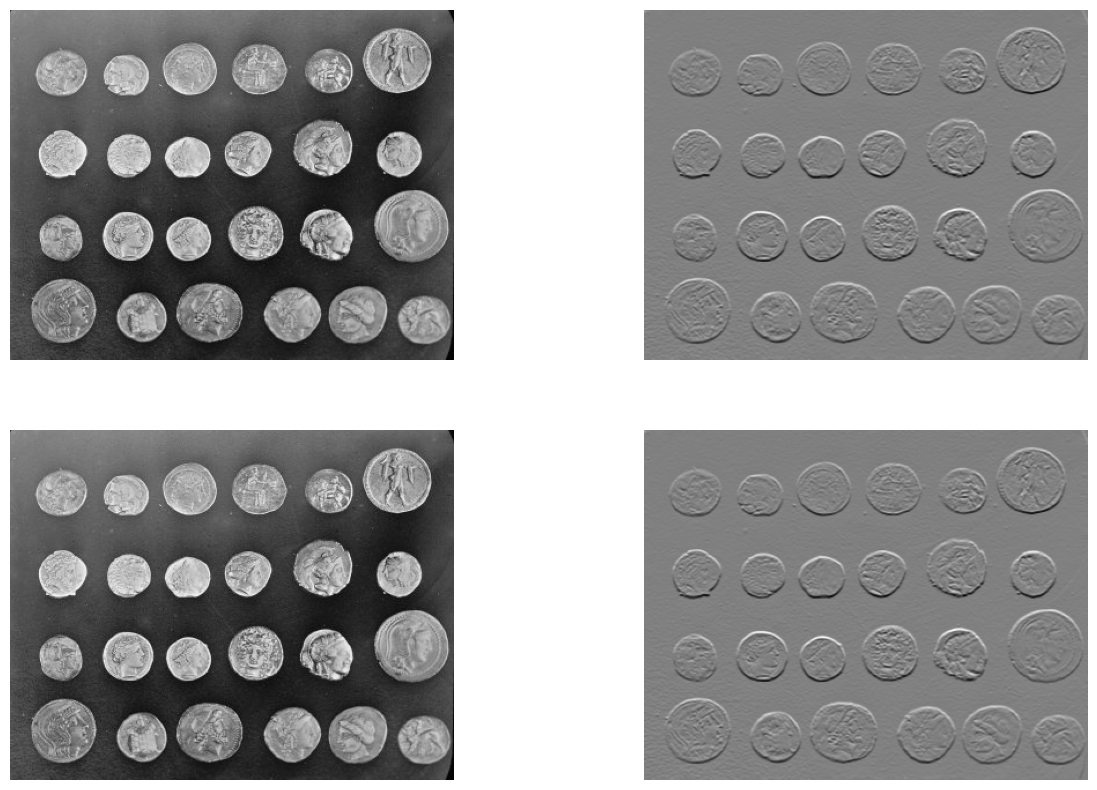

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data
from scipy.ndimage import convolve

# Load an image
#image = imread('cold.jpg', pilmode = 'F')
image = data.coins().astype(np.float32)

operator_vertical = np.array([  [1, 0, -1],
                                [2, 0, -2],
                                [1, 0, -1],])

operator_diagonal = np.array([  [1, 2, 1],
                                [0, 0, 0],
                                [-1, -2, -1],])

operator_vertical_l = np.array([[0, -1, -2],
                                [1, 0, -1],
                                [2, 1, 0],])

opertor_vertical_r = np.array([ [2, 1, 0],
                                [1, 0, -1],
                                [0, -1, -2],])

def sobel_filter(operator, image):
    kernel = operator/4
    return convolve(image, kernel)

filtered_image = sobel_filter(operator_diagonal, image) # replace this by your solution


fig = plt.figure(figsize=(15,10))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')

plt.tight_layout
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


ANSWER

Unsharp Masking: 
* sharpening edges
* redusing smoothing
* -> by empahsizing the difference between original and unsharp image

Difference Normalization and Clipping
* Norm: porportially arragned between 0 and 1
* Clipping: Values are restricted to specific range, cutting off any values that fall outside this range

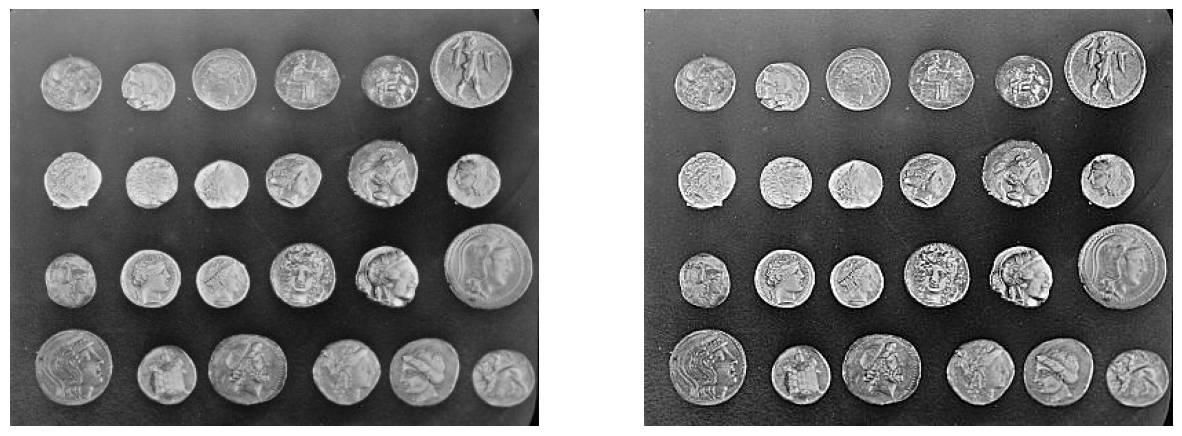

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE
def unsharp_mask(image, kernel, amount):
    unsharp_image = convolve(image, kernel)
    sharpened_image = image + (image - unsharp_image)* amount
    sharpened_image = np.clip(sharpened_image, 0, 255)
    return sharpened_image

unsharped_mask_image = unsharp_mask(image, gauss_5, amount)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 4: Implementing Convolution (4 points)

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel as arguments and return an image of the same size, containing the result of convolving the image with the kernel.

**(a)** First: you may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them in (b).

For the boundaries of an image $g(x,y)$, the convolution cannot be applied. Since $\displaystyle \hat{g}(x,y)=\sum_{i=0}^I\sum_{j=0}^{I}g(x+i-k,y+j-k)f(i,j)$ for $I\in[3,5,7,\dots]$ with kernel parameter $k=$ int($\frac{I}{2}$) uses unavailable values of the image $g(x+i-k,y+j-k)\le -1 $.

**(b)** Now implement your function. Apply it with different kernels and compare the results with the output of the library function `scipy.ndimage.correlate` (bonus question: why not `scipy.ndimage.convolve`?).

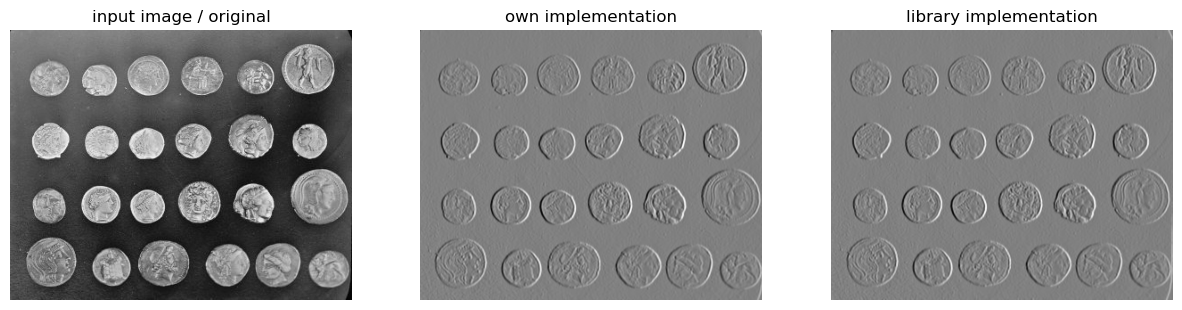

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import scipy.ndimage

def convolve(frame, kernel):
    k = kernel.shape[0]
    x,y = frame.shape
    res = [frame[i:i+k,j:j+k] for i in range(x-k) for j in range(y-k)]
    res = np.array(res) * kernel
    res = res.reshape(x-k,y-k,k,k)
    return res.mean(axis=(2,3)) 

# Apply your function to an image:
image = iio.imread("imageio:coins.png").astype(np.float32)

# Try different filters (kernels)
kernel = 1/4 * np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.title("input image / original")
plt.imshow(image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,2)
plt.title("own implementation")
plt.imshow(convolve(image, kernel), cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,3)
plt.title("library implementation")
plt.imshow(scipy.ndimage.correlate(image, kernel), cmap = 'gray')
plt.axis('off')
plt.show()